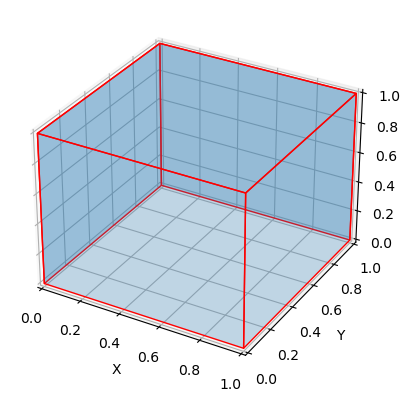

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
vertices = [
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
]
faces = [
    [vertices[0], vertices[1], vertices[5], vertices[4]],
    [vertices[7], vertices[6], vertices[2], vertices[3]],
    [vertices[0], vertices[4], vertices[7], vertices[3]],
    [vertices[1], vertices[5], vertices[6], vertices[2]],
    [vertices[4], vertices[5], vertices[6], vertices[7]]
]
cube = Poly3DCollection(faces, linewidths=1, edgecolors='r', alpha=.25)
ax.add_collection3d(cube)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [1]:
!pip install numpy


In [3]:
import numpy as np

def lire_fichier_stl(chess_pawn_ascii.stl):
    try:
        with open(stl_principle.svg, 'rb') as fichier_stl:
            fichier_stl.read(80)
            nb_triangles = np.fromfile(fichier_stl, dtype=np.uint32, count=1)[0]
            triangles = np.fromfile(fichier_stl, dtype=np.float32, count=nb_triangles*12).reshape((nb_triangles, 3, 4))
            triangles = triangles[:, :, :-1]
               return triangles
    except FileNotFoundError:
        print(f"Fichier STL '{nom_fichier}' non trouvé.")
        return None
    nom_fichier_stl = "chess_pawn_ascii.stl"
donnees_stl = lire_fichier_stl(chess_pawn_ascii.stl)

if donnees_stl is not None:
    print(f"Nombre de triangles : {donnees_stl.shape[0]}")
    print(f"Premier triangle : {donnees_stl[0]}")
            
            

SyntaxError: invalid syntax (4249203338.py, line 3)

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

class LoadSTLFile:
    def __init__(self, filename):
        self.filename = filename
        self.stlcontent = []
        self.vertices = []
        self.name = ""

    def read_file(self):
        try:
            with open(self.filename, "r") as stlfile:
                self.stlcontent = [line.strip() for line in stlfile.readlines() if line.strip()]
                self.name = self.stlcontent[0][6:]
        except FileNotFoundError:
            raise FileNotFoundError(f"File '{self.filename}' not found.")
        except Exception as e:
            raise Exception(f"An error occurred while reading the file: {str(e)}")

    def read_normals(self):
        if not self.stlcontent:
            self.read_file()
        normals = [line for line in self.stlcontent if 'facet normal' in line]
        coord_normals = np.array([line.split()[2:] for line in normals], dtype=float)
        return coord_normals

    def read_vertices(self):
        if not self.stlcontent:
            self.read_file()
        facet_total = len(self.read_normals())
        self.vertices = [line for line in self.stlcontent if 'vertex' in line]
        coord_vertices_all = np.array([line.split()[1:] for line in self.vertices], dtype=float)
        coord_vertices = coord_vertices_all.reshape((3, facet_total, 3), order='F').transpose(1, 2, 0)
        self.coord_vertices = coord_vertices
        return coord_vertices

    def plot_3d_line(self, label=None, color='b'):
        if not self.vertices:
            self.read_vertices()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for n in range(len(self.read_normals())):
            x = np.empty(4)
            y = np.empty(4)
            z = np.empty(4)
            # Define 3D line data
            x = np.append(self.coord_vertices[n,0], self.coord_vertices[n,0,0])
            y = np.append(self.coord_vertices[n,1], self.coord_vertices[n,1,0])
            z = np.append(self.coord_vertices[n,2], self.coord_vertices[n,2,0])
            # Plot the 3D line
            ax.plot(x, y, z, label=label, color=color)
        # Customize the plot
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.set_title('STL Plot')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_zlim(0, 10)
        # Display the plot
        plt.show()

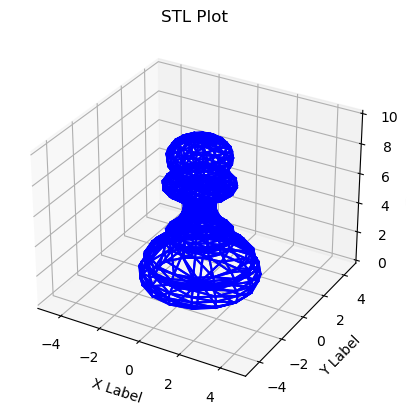

In [16]:
filename = "chess_pawn_ascii.stl"
loader = LoadSTLFile(filename)
normals = loader.read_normals()
vertices = loader.read_vertices()
loader.plot_3d_line(label="STL Plot", color='b')

In [12]:
loader = LoadSTLFile('chess_pawn_ascii.stl')

TypeError: LoadSTLFile() takes no arguments